# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [22]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [24]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [25]:
# TODO: Begin your EDA
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [26]:
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [27]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [28]:
transactions = transactions[["type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud", "isFlaggedFraud"]]

In [29]:
print(transactions["type"].unique())

['PAYMENT' 'CASH_IN' 'TRANSFER' 'CASH_OUT' 'DEBIT']


In [34]:
print(transactions["isFraud"].unique())

[0 1]


<Axes: xlabel='type', ylabel='amount'>

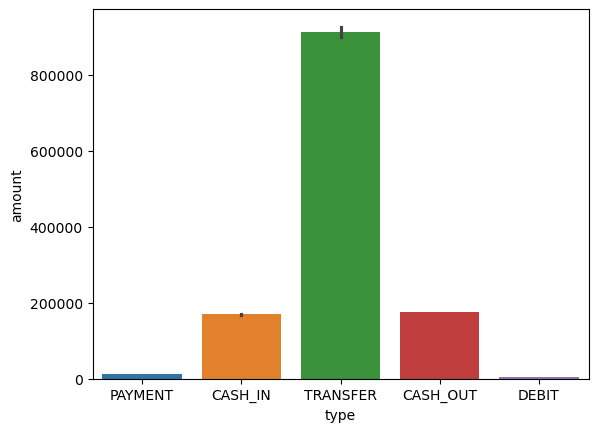

In [ ]:
#bar plot for each type of transaction 
sns.barplot(transactions, x="type", y="amount", hue="type")

In [31]:
payment_db = transactions[transactions["type"] == "PAYMENT"]
payment_db

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,36730.24,35747.15,0.0,0.0,0,0
1,PAYMENT,55215.25,99414.00,44198.75,0.0,0.0,0,0
5,PAYMENT,1317.57,0.00,0.00,0.0,0.0,0,0
7,PAYMENT,6542.95,0.00,0.00,0.0,0.0,0,0
10,PAYMENT,15611.50,510658.33,495046.83,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
999991,PAYMENT,8023.24,15898.00,7874.76,0.0,0.0,0,0
999992,PAYMENT,10709.41,470874.49,460165.08,0.0,0.0,0,0
999993,PAYMENT,8790.30,115514.06,106723.76,0.0,0.0,0,0
999995,PAYMENT,13606.07,114122.11,100516.04,0.0,0.0,0,0


<Axes: xlabel='amount', ylabel='Count'>

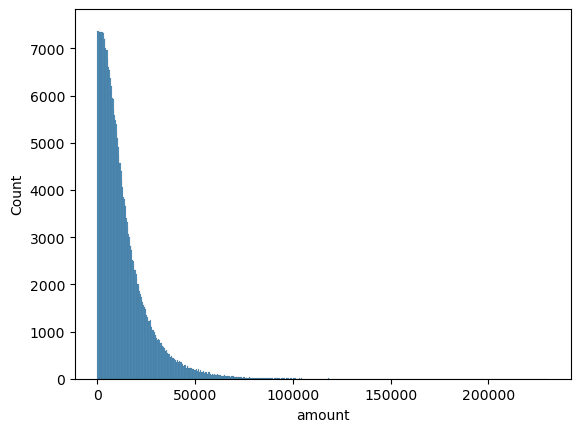

In [39]:
sns.histplot(payment_db, x="amount")

<Axes: xlabel='amount'>

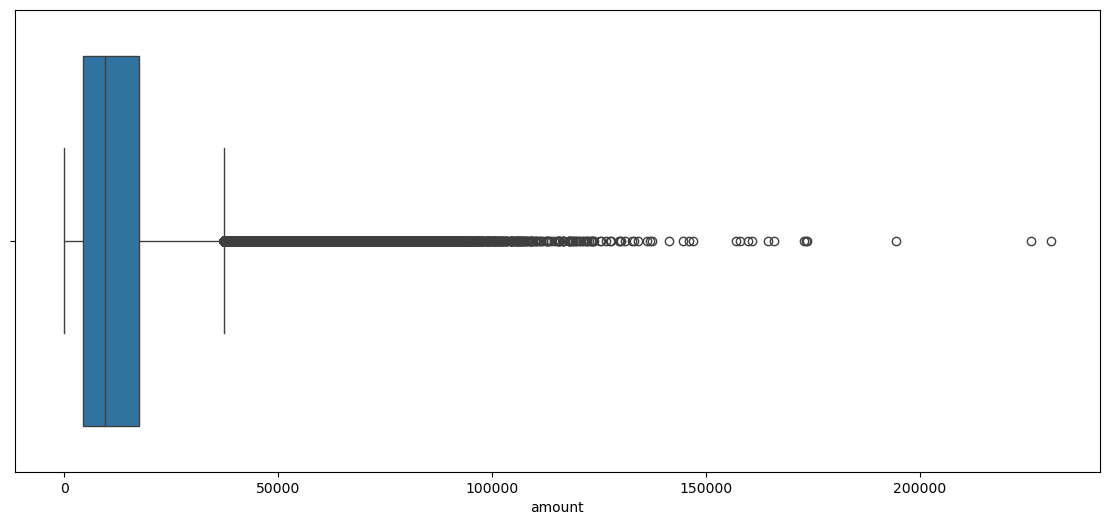

In [45]:
plt.figure(figsize=(14, 6))
sns.boxplot(payment_db, x="amount")

In [ ]:
sns.bar(payment_db, x=)

<Axes: xlabel='amount', ylabel='isFlaggedFraud'>

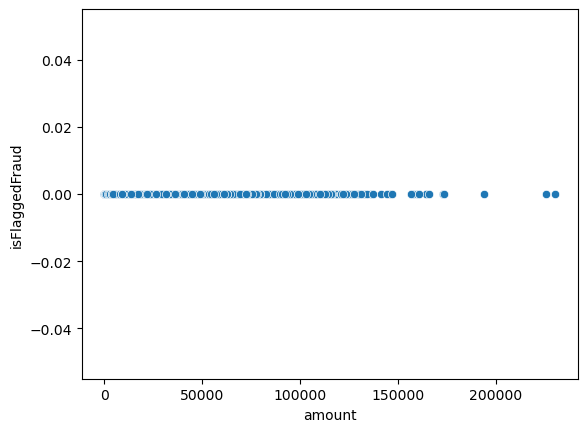

In [42]:
sns.scatterplot(payment_db, x="amount", y="isFlaggedFraud")

In [35]:
cashin_db = transactions[transactions["type"] == "CASH_IN"]
cashin_db

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0
9,CASH_IN,85239.82,117807.00,203046.82,0.00,291686.73,0,0
11,CASH_IN,57993.92,1191059.59,1249053.51,255776.44,197782.52,0,0
12,CASH_IN,291518.16,6945429.66,7236947.82,556809.51,102332.69,0,0
16,CASH_IN,223183.45,6718626.98,6941810.43,735637.82,512454.37,0,0
...,...,...,...,...,...,...,...,...
999975,CASH_IN,380408.85,127647.00,508055.85,391401.18,10992.33,0,0
999977,CASH_IN,199219.03,15108527.64,15307746.68,556337.08,357118.05,0,0
999985,CASH_IN,66209.16,3564183.80,3630392.96,716931.33,650722.17,0,0
999987,CASH_IN,210659.35,29864.00,240523.35,920478.68,709819.33,0,0


<Axes: xlabel='amount', ylabel='Count'>

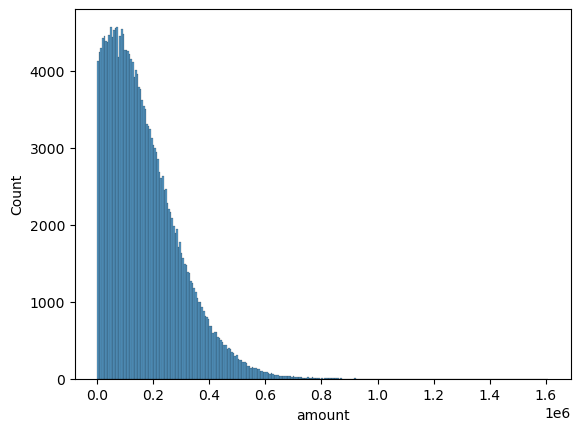

In [54]:
sns.histplot(cashin_db, x="amount")

In [36]:
cashout_db = transactions[transactions["type"] == "CASH_OUT"]
cashout_db

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4,CASH_OUT,67990.14,0.00,0.0,625317.04,693307.19,0,0
6,CASH_OUT,36932.75,11049.00,0.0,0.00,36932.75,0,0
8,CASH_OUT,137845.57,584.00,0.0,183521.42,321367.00,0,0
13,CASH_OUT,289136.25,43046.00,0.0,1219581.84,1508718.09,0,0
15,CASH_OUT,92011.56,0.00,0.0,4691067.63,4783079.19,0,0
...,...,...,...,...,...,...,...,...
999986,CASH_OUT,238572.38,0.00,0.0,11656410.86,11894983.24,0,0
999989,CASH_OUT,243445.57,193138.13,0.0,2908302.77,3151748.34,0,0
999997,CASH_OUT,153650.41,50677.00,0.0,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,0.00,0.0,357850.15,521660.67,0,0


<Axes: xlabel='amount', ylabel='Count'>

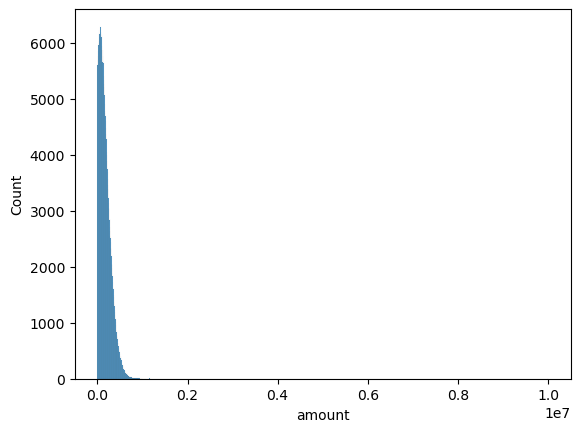

In [55]:
sns.histplot(cashout_db, x="amount")

In [37]:
transfer_db = transactions[transactions["type"] == "TRANSFER"]
transfer_db

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,TRANSFER,2357394.75,0.0,0.0,4202580.45,6559975.19,0,0
23,TRANSFER,387816.65,203294.0,0.0,154595.12,542411.77,0,0
38,TRANSFER,52655.31,0.0,0.0,3511961.47,3564616.77,0,0
52,TRANSFER,1281166.22,0.0,0.0,5731591.66,7012757.88,0,0
63,TRANSFER,10000000.00,35248.0,0.0,0.00,37047953.38,0,0
...,...,...,...,...,...,...,...,...
999942,TRANSFER,1013982.86,11626.0,0.0,679513.69,1693496.55,0,0
999962,TRANSFER,678727.95,10704.0,0.0,822237.52,1500965.47,0,0
999968,TRANSFER,631859.68,0.0,0.0,837214.44,1469074.12,0,0
999972,TRANSFER,13450.40,116721.0,103270.6,0.00,13450.40,0,0


<Axes: xlabel='amount', ylabel='Count'>

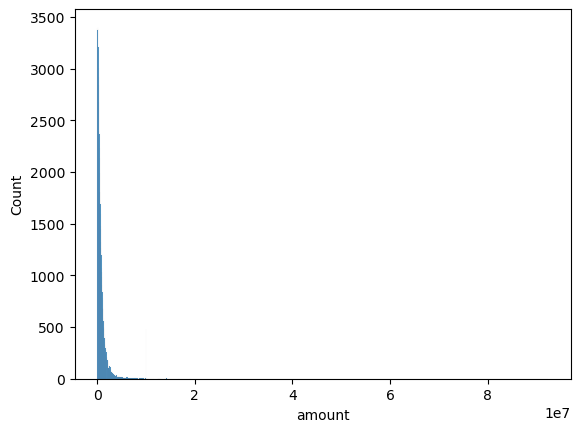

In [56]:
sns.histplot(transfer_db, x="amount")

In [38]:
debit_db = transactions[transactions["type"] == "DEBIT"]
debit_db

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
168,DEBIT,3383.38,49691.0,46307.62,2541231.75,2544615.14,0,0
355,DEBIT,1451.74,110.0,0.00,32793.60,34245.34,0,0
520,DEBIT,4290.29,13458.0,9167.71,3506284.45,3510574.74,0,0
785,DEBIT,4308.00,25671.0,21363.00,106694.97,111002.96,0,0
976,DEBIT,6898.04,32234.0,25335.96,1647933.67,1654831.71,0,0
...,...,...,...,...,...,...,...,...
999153,DEBIT,2983.70,0.0,0.00,17138.12,20121.82,0,0
999202,DEBIT,1732.23,49528.0,47795.77,8456068.39,8457800.62,0,0
999616,DEBIT,6152.35,17401.0,11248.65,1022866.48,1029018.82,0,0
999677,DEBIT,2308.85,231.0,0.00,19205.78,21514.63,0,0


In [ ]:
for col in debit_db:
    plt.figure(figsize=(6,3))
    sns.histplot(transactions[col], kde=True, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [49]:
#separate numerical and non-numerical data
num_db = transactions[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]

num_db.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,983.09,36730.24,35747.15,0.00,0.00
1,55215.25,99414.00,44198.75,0.00,0.00
2,220986.01,7773074.97,7994060.98,924031.48,703045.48
3,2357394.75,0.00,0.00,4202580.45,6559975.19
4,67990.14,0.00,0.00,625317.04,693307.19


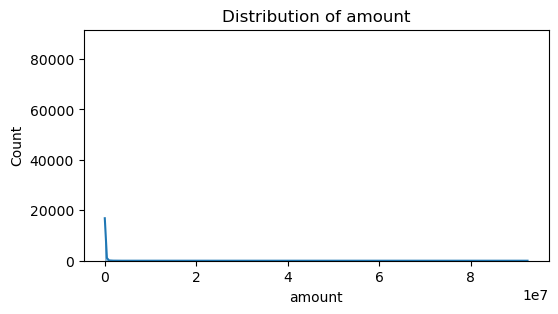

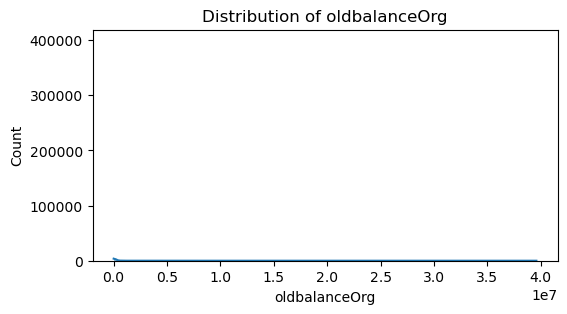

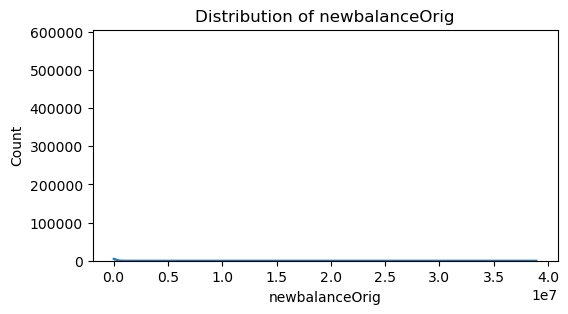

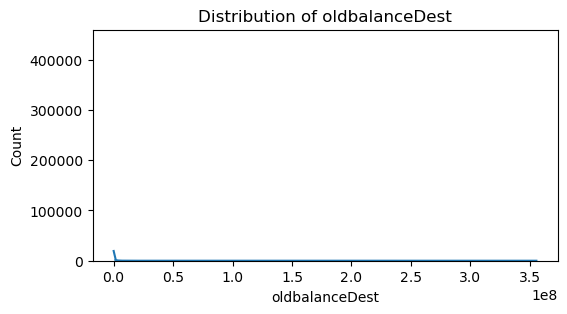

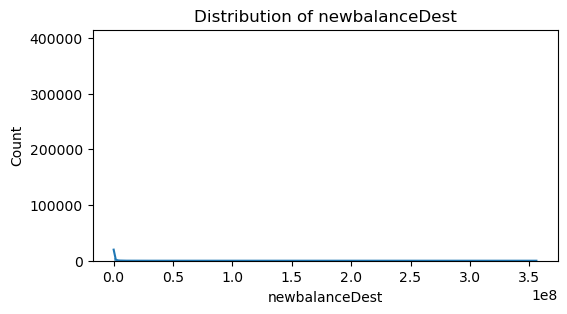

In [52]:
for col in num_db:
    plt.figure(figsize=(6,3))
    sns.histplot(transactions[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

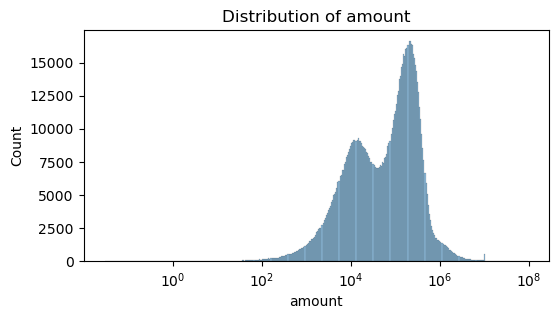

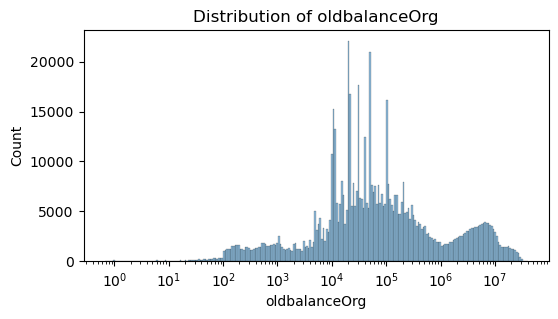

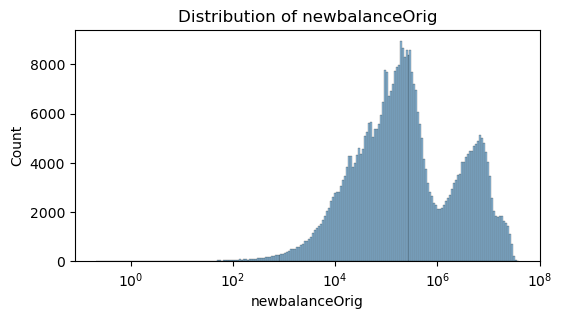

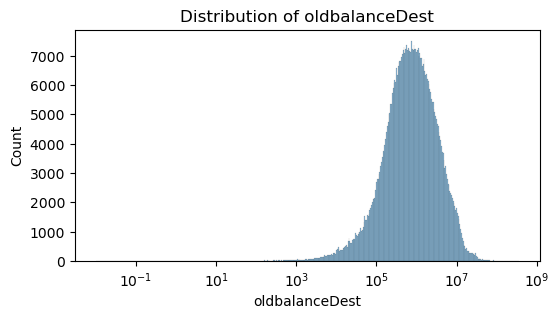

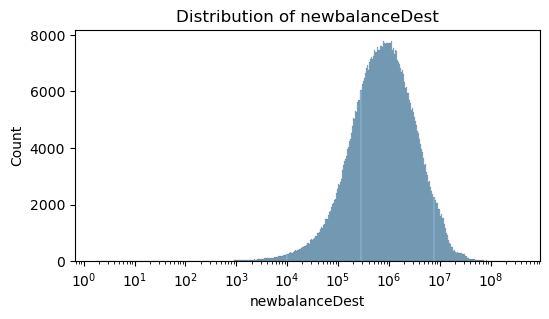

In [50]:
for col in num_db:
    plt.figure(figsize=(6,3))
    sns.histplot(transactions[col], kde=True, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    

In [53]:
num_db.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here